# Road Traffic Accidents Analysis
# Assignment - 771762

In [2]:
#!pip install suntime

In [3]:
# Loading and Importing all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import*
from sklearn.feature_selection import*
from suntime import Sun
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import *
from matplotlib import pyplot
from sklearn.decomposition import *
from sklearn.preprocessing import *

### Loading the Dataset for accidents_df, casualties_df, and vehicles_df

In [4]:
# Load Dataset (Road Safety Data - Accidents 2019)
accidents_df = pd.read_csv('Road Safety Data - Accidents 2019.csv')
accidents_df.head()

C:\Users\ju\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [5]:
# Load Dataset (Road Safety Data - Casualties 2019)
casualties_df = pd.read_csv('Road Safety Data - Casualties 2019.csv')
casualties_df.head()

C:\Users\ju\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [6]:
# Load Dataset (Road Safety Data - Vehicles 2019)
vehicles_df = pd.read_csv('Road Safety Data- Vehicles 2019.csv')
vehicles_df.head()

C:\Users\ju\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


# Data Insights

In [7]:
# Print the Data Structure for the all three Datasets
print("There is", accidents_df.shape[0], "observation and", accidents_df.shape[1], "columns in the accidents dataset")
print("There is", casualties_df.shape[0], "observation and", casualties_df.shape[1], "columns in the casualties dataset")
print("There is", vehicles_df.shape[0], "observation and", vehicles_df.shape[1], "columns in the vehicles dataset")

There is 117536 observation and 32 columns in the accidents dataset
There is 153158 observation and 16 columns in the casualties dataset
There is 216381 observation and 23 columns in the vehicles dataset


In [8]:
# Print Data Information for accidents_df
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [9]:
# Print Data Information for casualties_df
casualties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [10]:
# Print Data Information for vehicles_df
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

#### Connections between Datasets
The Connections between all the Datasets is Accident_Index and Vehicle_Reference is common to casualties_df, vehicles_df. 

In [11]:
# Determine the Null Values in accidents_df
accidents_df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

The output above shows that missing values are in Location_Easting_OSGR, Location_Northing_OSGR, Longitude, Latitude, Time, LSOA_of_Accident_Location columns of accidents_df data

In [12]:
# Determine the Null Values in casualties_df
casualties_df.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

The output above shows that there are no null values in casualties_df

In [13]:
# Determine the Null Values in vehicles_df
vehicles_df.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

The output above shows that there are no null values in vehicles_df

### Data Cleaning

In [14]:
# To view more columns and rows in the dataset. 
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [15]:
# Location_Easting_OSGR and Location_Northing_OSGR are geographically same and have high cardinality so it will be dropped because it is not useful for the analysis.
accidents_df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location'], axis=1, inplace=True)

In [16]:
# Get all the rows with null values in longitude column of accidents_df.
accidents_df[accidents_df.Longitude.isnull()]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
27337,2019040854828,NaN,NaN,4,3,2,1,21/06/2019,6,20:15,114,E08000010,1,6,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,2
29369,2019051910615,NaN,NaN,5,3,1,1,04/03/2019,2,17:50,95,E08000015,6,0,6,30,3,4,6,0,0,0,4,5,2,0,0,3,1
30791,2019051912864,NaN,NaN,5,2,2,2,08/11/2019,6,19:18,91,E08000012,6,0,6,30,0,-1,-1,0,0,0,6,1,2,0,0,3,1
34816,2019070003662,NaN,NaN,7,3,1,1,04/01/2019,6,15:56,130,E06000050,3,5268,6,30,9,2,6,0,0,0,1,9,1,0,0,3,1
35505,2019070275916,NaN,NaN,7,3,2,1,28/05/2019,3,18:00,128,E06000007,3,574,1,30,1,4,3,574,0,0,1,1,1,0,0,3,2
36347,2019070700923,NaN,NaN,7,3,2,1,30/11/2019,7,11:35,129,E06000049,3,34,1,50,1,2,3,555,0,0,1,1,1,0,0,3,1
39798,2019121900341,NaN,NaN,12,2,1,2,24/02/2019,1,15:38,187,E10000023,3,63,3,70,0,-1,-1,0,0,0,1,1,1,0,0,3,1
39919,2019121900485,NaN,NaN,12,3,2,3,08/04/2019,2,08:47,185,E10000023,3,64,3,70,3,4,6,0,0,0,1,1,1,0,0,3,1
39933,2019121900505,NaN,NaN,12,3,2,1,18/03/2019,2,17:57,182,E10000023,6,0,6,30,3,4,3,59,0,0,4,1,2,0,0,3,1
40179,2019121900771,NaN,NaN,12,3,3,1,02/02/2019,7,10:29,186,E10000023,4,1229,6,60,0,-1,-1,0,0,0,1,3,3,0,0,3,1


It was observed that the Local_Authority_(District) column was the closest denominator to use in determining the missing values for latitude and longitude. So the mean of the longitude and latitude of those columns with the same Local_Authority_(District) was pulled out and used to fix the values of longitude and latitude in that columns that are null.   

In [17]:
# Fixing Null values in Longitude and Latitude 
missing_rows = accidents_df.Latitude[accidents_df.Latitude.isnull()].index.to_list()
# replace the null values in longitude and latitude with mean of Local_Authority_(District) 
for index in missing_rows:
    key = accidents_df.loc[index, 'Local_Authority_(District)']
    accidents_df.loc[index, 'Longitude'] = np.mean(accidents_df[accidents_df['Local_Authority_(District)'] == key]['Longitude'])
    
for index in missing_rows:
    key = accidents_df.loc[index, 'Local_Authority_(District)']
    accidents_df.loc[index, 'Latitude'] = np.mean(accidents_df[accidents_df['Local_Authority_(District)'] == key]['Latitude']) 

In [18]:
# Replace null values in Time column of accidents_df with the mode values.
accidents_df.Time.fillna(accidents_df.Time.mode()[0], inplace = True)

In [19]:
accidents_df.Time.mode()

0    17:00
dtype: object

### Feature Engineering

In [20]:
# Build a function
def change_date(col):
    accidents_df[col] = pd.to_datetime(accidents_df[col])

In [21]:
# Change Time and Date object datatype to daytime format 
change_date('Time')
change_date('Date')

In [22]:
# create columns for hour, minute, decimal time and day
def timeseries(dataframe):
    dataframe['hour'] = dataframe.Time.dt.hour
    dataframe['minute'] = dataframe.Time.dt.minute
    dataframe['decimal_time'] = dataframe.hour + dataframe.minute/60
    dataframe['day'] = dataframe.Date.dt.day

# create a function to determine the hours of the day which accidents occur.
def timeperiod(hour):
    if hour in range(6, 10):
        return 'Rush hour period in the morning (6-10)'
    elif hour in range(10, 15):
        return 'off peak period (10-15)'
    elif hour in range(15, 19):
        return 'Rush hour period in the afternoon (15-19)'
    elif hour in range(19, 23):
         return 'closing period in the evening (19-23)'
    else:
            return 'night (23-6)'

# Create function to convert variables with object datatypes to string.      
def change_string(dataframe, col):
    dataframe[col] = dataframe[col].apply(str)

In [23]:
timeseries(accidents_df)

In [24]:
accidents_df['period'] = accidents_df['hour'].apply(timeperiod)       

In [25]:
# Convert variables with object datatypes to string.
change_string(accidents_df, 'Accident_Index')
change_string(vehicles_df, 'Accident_Index')
change_string(casualties_df, 'Accident_Index')

### Data Analysis

####  (a) Determine the significant hours of the day and days of the week which accidents occur

C:\Users\ju\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '\nDistribution of accidents by time of the day')

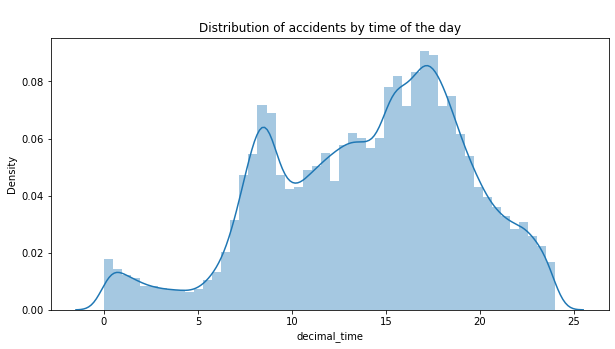

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(accidents_df.decimal_time)
ax.set_title('\nDistribution of accidents by time of the day')

The graph above shows that the count of decimal time of the day which accidents occur mostly is in the morning at 8:00 when people are rushing to work. Also, there is significant portion in a day that accident do happen which is from 15:00 to 20:00 that can be classified under rush hour period in the afternoon when people are going back home.

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '\nDistribution of accidents Day of the Week')

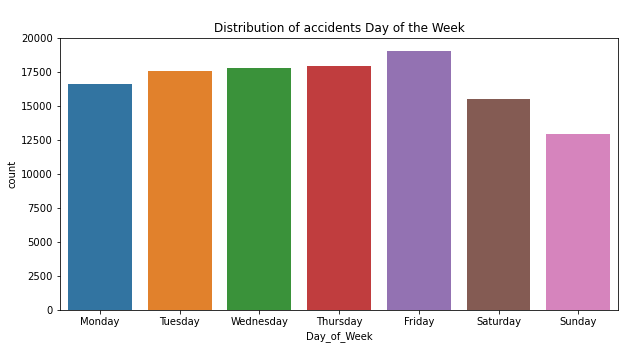

In [27]:
# Graph showing days of the week which accidents occur
accdt_dayOfWeek =accidents_df.copy()
accdt_dayOfWeek['Day_of_Week'].replace({1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}, inplace = True)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(accdt_dayOfWeek['Day_of_Week'])
ax.set_title('\nDistribution of accidents Day of the Week')

Significant day of week which accident occur mostly in the graph above is friday.

<AxesSubplot:xlabel='hour', ylabel='Day_of_Week'>

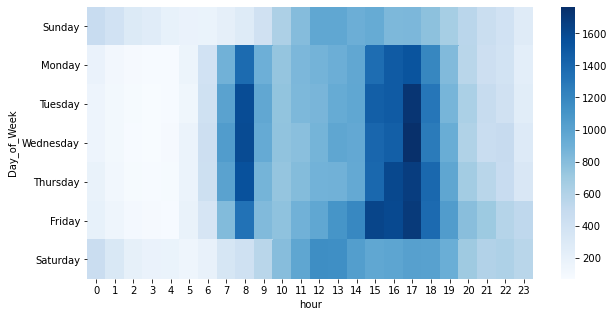

In [28]:
# Use heatmap to show days of the week and the particular hours of the day which accident occur
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# graph merging day of the week accident occur and time from 0hour to 23hours 
dayOfWeek_hoursOfAccdt = accdt_dayOfWeek.groupby(['Day_of_Week', 'hour']).size().unstack('hour').reindex(days)

plt.figure(figsize=(10,5))
sns.heatmap(dayOfWeek_hoursOfAccdt, cmap='Blues')

The Heatmap above shows that accident occurs during rush hour period in the morning by 8:00 and also during rush hour period in the afternoon between 15:00 and 18:00 with accidents occuring mostly at 17:00 from mondays to fridays. It can also be observed that there is high concentration of accidents happening on fridays from 15:00 to 17:00. 

### B)  Significant hours of the day, and days of the week which motorbikes accidents occur 

In [29]:
# merge day of the week accidents occurs and vehicle dataframe
vehicles = pd.merge(accdt_dayOfWeek, vehicles_df, on='Accident_Index', how='inner')

#cas = pd.merge(accdt_dows, casualties_df, on='Accident_Index', how='inner')

In [30]:
# Number of motorbikes in accident data  
motorbikes = [2,3,4,5,23,97]
accdt_motorbikes = vehicles[vehicles['Vehicle_Type'].isin(motorbikes)]
len(accdt_motorbikes) 

17369

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '\nDistribution of motorbike accidents by time of the day')

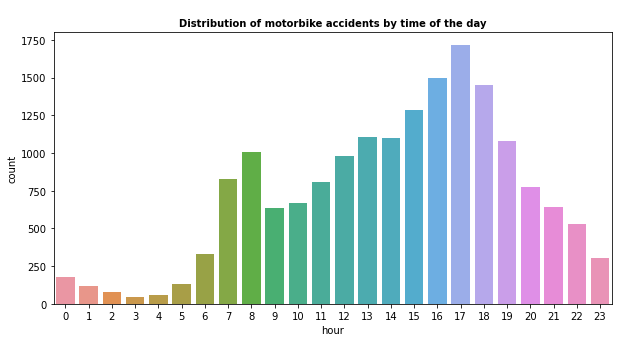

In [31]:
# Distribution of motorbike by time of the day
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(accdt_motorbikes.hour)
ax.set_title('\nDistribution of motorbike accidents by time of the day', fontsize=10, fontweight='bold')

The graph above shows the hours of the day in which the most occuring motorbikes accidents occurs which falls within the range of 15:00 to 18:00 with 17:00 being the most time motorbikes accidents occurs.

In [32]:
# Percentage of motorbikes accidents per day of the week
percentage_motorbikesAccdt = accdt_motorbikes.groupby(['Day_of_Week']).agg({'Day_of_Week':'count'}).rename(columns={'Day_of_Week':'count'})
percentage_motorbikesAccdt['of %'] = percentage_motorbikesAccdt['count'] / percentage_motorbikesAccdt['count'].sum()
percentage_motorbikesAccdt

,count,of %
Day_of_Week,,
Friday,2838,0.163395
Monday,2275,0.130980
Saturday,2312,0.133111
Sunday,2213,0.127411
Thursday,2609,0.150210
Tuesday,2524,0.145316
Wednesday,2598,0.149577


The day with the highest percentage (0.163) of motorbikes accidents is Friday. Which means that the day of week which motorbikes accidents occurs mostly is Friday.

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '\nDistribution of motorbike accidents by Day of the Week')

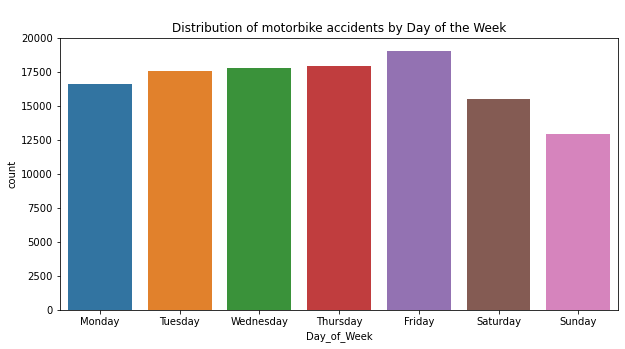

In [33]:
accdt_motorbikes =accidents_df.copy()
accdt_motorbikes['Day_of_Week'].replace({1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}, inplace = True)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(accdt_motorbikes['Day_of_Week'])
ax.set_title('\nDistribution of motorbike accidents by Day of the Week')

In [34]:
# list of motorbikes accidents that occurs in week days
motorbikes_accdtdata = accdt_motorbikes['Day_of_Week'].value_counts().tolist()

In [35]:
# Check the significance of motorbikes accidents in week days using Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(motorbikes_accdtdata)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.902, p=0.341
Probably Gaussian


The result shows that the pvalue is 0.578 which is greater than 0.05 meaning that motorbikes accidents in days of the week is probably gaussian which means that there is no significant day of the week in which accident occurs.

In [36]:
# list of motorbikes accidents that occurs in hours of the day
motorbikes_accdtdata = accdt_motorbikes.decimal_time.value_counts().tolist()

# Check the significance of motorbikes accidents in time of the day using Shapiro-Wilk Normality Test
stat, p = shapiro(motorbikes_accdtdata)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.524, p=0.000
Probably not Gaussian


The result shows that the pvalue is 0.000 which is less than 0.05 meaning that motorbikes accidents in hours of the day is probably not gaussian which means that there is significant hours of the day in which motorbike accident occurs.

### C) Significant hours of the day, and days of the week, which  pedestrians are more likely to be involved involved in accidents

In [37]:
# merge the accidents day of the week and casualty dataframe
casualties_accdtDay =pd.merge(accdt_dayOfWeek, casualties_df, on='Accident_Index', how='inner')

In [38]:
# Number of pedestrians involved in an accidents
pedestrian = [0]
pedestrian_accdt = casualties_accdtDay[casualties_accdtDay['Casualty_Type'].isin(pedestrian)]
len(pedestrian_accdt)

21770

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '\nDistribution of pedestrians involve in accidents by time of the day')

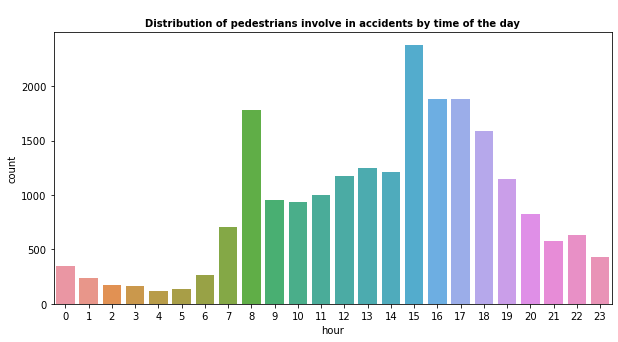

In [39]:
# Distribution of motorbike by time of the day
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(pedestrian_accdt.hour)
ax.set_title('\nDistribution of pedestrians involve in accidents by time of the day', fontsize=10, fontweight='bold')

The graph above shows the hours of the day in which pedestrians involve in accidents mostly. It falls within the range of 15:00 to 18:00 (in the afternoon rush hour period) with 15:00  being the most time pedestrians involve in an accidents. Also, in 8:00 (during the rush hour period in the morning).

In [40]:
# list of pedestrians accidents that occurs in hours of the day
pedestrian_accdtTime_data = casualties_accdtDay.decimal_time.value_counts().tolist()

# Check the significance of hours of the day of pedestrians involved in an accidents using Shapiro-Wilk Normality Test
stat, p = shapiro(pedestrian_accdtTime_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.538, p=0.000
Probably not Gaussian


The result shows that the pvalue is 0.000 which is less than 0.05 meaning that hours of the day of pedestrians involved in an accidents is probably not gaussian which is Significant.

In [41]:
# counts of pedestrian accidents list that occurs in week days
pedestrian_accdtDay_data = casualties_accdtDay.Day_of_Week.value_counts().tolist()

# Check the significance of days of the week pedestrians involved in an accidents using Shapiro-Wilk Normality Test
stat, p = shapiro(pedestrian_accdtDay_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.908, p=0.381
Probably Gaussian


The result shows that the pvalue is 0.381 which is greater than 0.05 meaning that day of the week which pedestrian involve in accidents is probably gaussian which is not Significant.

In [42]:
# Percentage of pedestrians involve in accidents per day of the week
percentage_pedestrianAccdt = pedestrian_accdt.groupby(['Day_of_Week']).agg({'Day_of_Week':'count'}).rename(columns={'Day_of_Week':'count'})
percentage_pedestrianAccdt['of %'] = percentage_pedestrianAccdt['count'] / percentage_pedestrianAccdt['count'].sum()
percentage_pedestrianAccdt

,count,of %
Day_of_Week,,
Friday,3649,0.167616
Monday,3132,0.143868
Saturday,2839,0.130409
Sunday,1964,0.090216
Thursday,3482,0.159945
Tuesday,3332,0.153055
Wednesday,3372,0.154892


The day with the highest percentage (0.168) of pedestrians involve in accidents is Friday. 

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '\nDistribution of pedestrian accidents by Day of the Week')

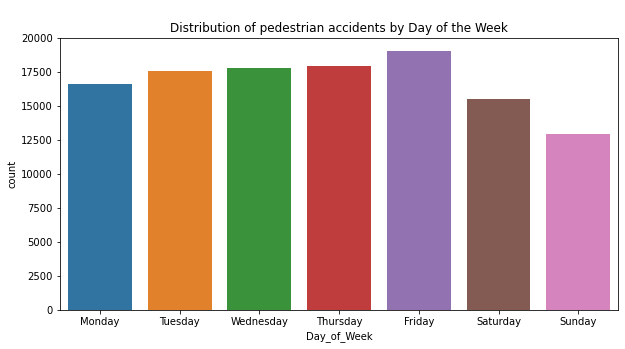

In [43]:
pedestrian_accdt =accidents_df.copy()
pedestrian_accdt['Day_of_Week'].replace({1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday'}, inplace = True)

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(pedestrian_accdt['Day_of_Week'])
ax.set_title('\nDistribution of pedestrian accidents by Day of the Week')

The graph above indicates that the day of week which pedestrians involve mostly in an accidents is Friday. 

### (d)	Impact of daylight savings on road traffic accidents in the week after it starts and stops

In [44]:
def get_data(start, end):
    data = accidents_df[accidents_df.Date.between(start, end) ]
    data = data.groupby('Date')['Accident_Index'].count()
    return data

In [45]:
# week before and after daylight starting
pre_daylight_start = get_data('2019-03-24', '2019-03-30')
post_daylight_start = get_data('2019-04-01', '2019-04-07')

In [46]:
# student's t-test to check for the significance increase of daylight saving in accidents
from scipy.stats import ttest_ind

# samples comparison
stat, p = ttest_ind(pre_daylight_start, post_daylight_start)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpretation
alpha = 0.05

if p > alpha:
  print('Same distributions (fail to reject H0)')
else:
  print('Different distributions (reject H0)')

Statistics=0.351, p=0.732
Same distributions (fail to reject H0)


student's t-test was used to compare week before and week after daylight started to confirm if there is a significance increase of daylight saving in road traffic accidents, and it was observed that there is no significance difference with p value = 0.732, therefore it fails to reject H0. 

In [47]:
# week before and after daylight ending
pre_daylight_end = get_data('2019-10-20', '2019-10-26')
post_daylight_end = get_data('2019-10-28', '2019-11-03')

In [48]:
# student's t-test to check for the significance increase of daylight saving in accidents
from scipy.stats import ttest_ind

# samples comparison
stat, p = ttest_ind(pre_daylight_end, post_daylight_end)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpretation
alpha = 0.05

if p > alpha:
  print('Same distributions (fail to reject H0)')
else:
  print('Different distributions (reject H0)')

Statistics=-0.943, p=0.364
Same distributions (fail to reject H0)


Using student's t-test to compare week before and week after daylight ended to confirm if there is a significance increase of daylight saving in road traffic accidents, and it was observed that there is no significance difference with p value = 0.364, therefore it fails to reject H0.

####  (E) Impact of Sunrise and Sunset Times on road traffic accidents

In [49]:
def sunrise_sunset(lat, lon, date):
    sun = Sun(lat, lon)
    date = date
    sunrise = sun.get_local_sunrise_time(date).strftime('%H:%M')
    sunset = sun.get_local_sunset_time(date).strftime('%H:%M')
    return sunrise, sunset

In [50]:
accidents_df['sunrise'] = accidents_df.apply(lambda x: sunrise_sunset(x['Latitude'], x['Longitude'], x['Date'])[0],axis=1)
accidents_df['sunset'] = accidents_df.apply(lambda x: sunrise_sunset(x['Latitude'], x['Longitude'], x['Date'])[1],axis=1)

In [51]:
# convert to time stamp
change_date('sunrise')
change_date('sunset')

In [52]:
# convert to decimal time
def timeseries_suntime(df, col, col_name):
    df[col_name] = df[col].dt.hour + df[col].dt.minute/60
    
timeseries_suntime(accidents_df, 'sunrise', 'sunrise_decimal_time')
timeseries_suntime(accidents_df, 'sunset', 'sunset_decimal_time')

In [53]:
var_time = 20/60
var_time

0.3333333333333333

#### Sunrise

In [54]:
accidents_df['sunrise_before'] = accidents_df.decimal_time.between((accidents_df['sunrise_decimal_time']-var_time), accidents_df['sunrise_decimal_time'])
accidents_df['sunrise_after'] = accidents_df.decimal_time.between(accidents_df['sunrise_decimal_time'],(accidents_df['sunrise_decimal_time'] + var_time))

In [55]:
# number of accidents 20 mins to sunrise time
sunriseBefore_data = accidents_df[accidents_df.sunrise_before == True]
sunriseBefore_data = sunriseBefore_data.groupby('Day_of_Week')['Accident_Index'].count()
sunriseBefore_data

Day_of_Week
1     69
2    206
3    187
4    207
5    192
6    160
7     66
Name: Accident_Index, dtype: int64

In [56]:
# number of accidents 20 mins past sunrise time
sunriseAfter_data = accidents_df[accidents_df.sunrise_after == True]
sunriseAfter_data = sunriseAfter_data.groupby('Day_of_Week')['Accident_Index'].count()
sunriseAfter_data

Day_of_Week
1     66
2    215
3    248
4    226
5    211
6    187
7     79
Name: Accident_Index, dtype: int64

In [57]:
# student's t-test to check for the significance difference in sunrise for road accidents
from scipy.stats import ttest_ind
# compare samples
stat, p = ttest_ind(sunriseBefore_data, sunriseAfter_data)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
  print('Same distributions (fail to reject H0)')
else:
  print('Different distributions (reject H0)')

Statistics=-0.572, p=0.578
Same distributions (fail to reject H0)


There is no significance diffence in number of accidents 20 mins to sunrise time and number of accidents 20 mins past sunrise time.

#### Sunset

In [58]:
# Sunset
accidents_df['sunset_before'] = accidents_df.decimal_time.between((accidents_df['sunset_decimal_time']-var_time), accidents_df['sunset_decimal_time'])
accidents_df['sunset_after'] = accidents_df.decimal_time.between(accidents_df['sunset_decimal_time'],(accidents_df['sunset_decimal_time'] + var_time))

In [59]:
# number of accidents 20 mins to sunset time
sunsetBefore_data = accidents_df[accidents_df.sunset_before == True]
sunsetBefore_data = sunsetBefore_data.groupby('Day_of_Week')['Accident_Index'].count()
sunsetBefore_data

Day_of_Week
1    209
2    300
3    300
4    355
5    371
6    342
7    240
Name: Accident_Index, dtype: int64

In [60]:
# number of accidents 20 mins past sunset time
sunsetAfter_data = accidents_df[accidents_df.sunset_after == True]
sunsetAfter_data = sunsetAfter_data.groupby('Day_of_Week')['Accident_Index'].count()
sunsetAfter_data

Day_of_Week
1    216
2    287
3    315
4    333
5    345
6    331
7    239
Name: Accident_Index, dtype: int64

In [61]:
# student's t-test
from scipy.stats import ttest_ind
# compare samples
stat, p = ttest_ind(sunsetBefore_data, sunsetAfter_data)

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
  print('Same distributions (fail to reject H0)')
else:
  print('Different distributions (reject H0)')

Statistics=0.246, p=0.810
Same distributions (fail to reject H0)


There is no significance difference in number of accidents 20 mins to sunset time and number of accidents 20 mins past sunset time. 

#### (f)  Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents? 

In [62]:
# Number of vehicles
accidents_df.groupby('Number_of_Vehicles')['Accident_Index'].count()

Number_of_Vehicles
1     34168
2     71898
3      8684
4      2034
5       488
6       158
7        59
8        29
9         9
10        2
11        1
12        1
13        2
14        1
15        1
17        1
Name: Accident_Index, dtype: int64

### Vehicle Outliers

In [63]:
#Detecting outlier in number of vehicle
a = accidents_df['Number_of_Vehicles']
q75, q25 = np.percentile(a, [75, 25])
iqr = q75 - q25
print(q25-1.5*iqr, q75+1.5*iqr)

-0.5 3.5


In [64]:
# Reduce the number of vehicles that is higher than 4 to 5
accidents_df['Number_of_Vehicles'] = accidents_df['Number_of_Vehicles'].apply(lambda x : 5 if x > 4 else x)

In [65]:
accidents_df.groupby('Number_of_Vehicles')['Accident_Index'].count()

Number_of_Vehicles
1    34168
2    71898
3     8684
4     2034
5      752
Name: Accident_Index, dtype: int64

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_of_Vehicles', ylabel='count'>

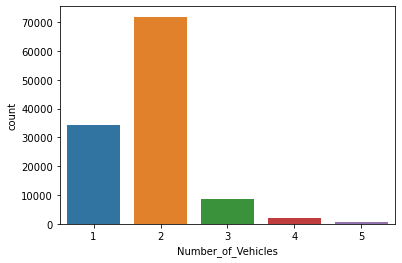

In [66]:
sns.countplot(accidents_df['Number_of_Vehicles'])

This means that the highest number of accidents occurs between colition of two vehicles

In [67]:
# Age of Vehicles
vehicles_df.groupby('Age_of_Vehicle')['Accident_Index'].count()

Age_of_Vehicle
-1     61755
 1     12103
 2     11907
 3     12356
 4     11992
 5     10630
 6      9550
 7      8580
 8      8279
 9      8302
 10     7969
 11     8490
 12     9201
 13     8056
 14     6885
 15     5944
 16     4584
 17     3343
 18     2101
 19     1308
 20      918
 21      538
 22      358
 23      260
 24      181
 25      128
 26       77
 27       68
 28       76
 29       74
 30       46
 31       34
 32       23
 33       32
 34       17
 35       15
 36       15
 37       18
 38       12
 39       20
 40       18
 41       15
 42        8
 43       10
 44        7
 45        3
 46        2
 47        5
 48        3
 49        1
 50        4
 51        5
 52        6
 53        3
 54        2
 55        3
 56        3
 57        6
 58        3
 59        6
 60        5
 61        2
 62        1
 63        1
 65        2
 66        2
 71        1
 72        1
 74        1
 77        1
 80        1
 87        2
 88        1
 90        1
 94        1
Name: Acci

In [68]:
#Detecting outlier in Age of vehicle
a = vehicles_df['Age_of_Vehicle']
q75, q25 = np.percentile(a, [75, 25])
iqr = q75 - q25
print(q25-1.5*iqr, q75+1.5*iqr)

-17.5 26.5


In [69]:
# Age of Vehicle greater than 19years is reduced to 20 years
vehicles_df['Age_of_Vehicle'] = vehicles_df['Age_of_Vehicle'].apply(lambda x : 20 if x > 19 else x)

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


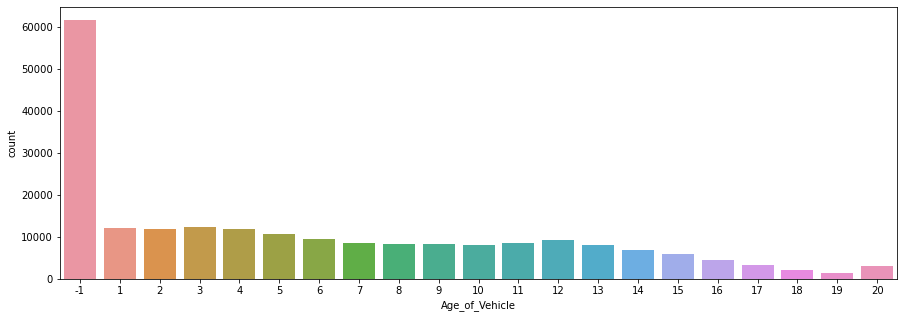

In [70]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(vehicles_df['Age_of_Vehicle'])

This shows how long each of this vehicles has been used with maximum age of vehicles reduced to 20years.

In [71]:
# Engine Capacity
vehicles_df['Engine_Capacity_(CC)'].describe()

count    216381.000000
mean       1378.949589
std        1593.463569
min          -1.000000
25%          -1.000000
50%        1390.000000
75%        1910.000000
max       29980.000000
Name: Engine_Capacity_(CC), dtype: float64

In [72]:
#Detecting outlier in Engine Capacity
a = vehicles_df['Engine_Capacity_(CC)']
q75, q25 = np.percentile(a, [75, 25])
iqr = q75 - q25
print(q25-1.5*iqr, q75+1.5*iqr)

-2867.5 4776.5


In [73]:
vehicles_df['Engine_Capacity_(CC)'] = vehicles_df['Engine_Capacity_(CC)'].apply(lambda x: 0 if x > 0 and x < 1000 else x)
vehicles_df['Engine_Capacity_(CC)'] = vehicles_df['Engine_Capacity_(CC)'].apply(lambda x: 1 if x >= 1000 and x < 1500 else x)
vehicles_df['Engine_Capacity_(CC)'] = vehicles_df['Engine_Capacity_(CC)'].apply(lambda x: 2 if x >=1500 and x < 1800 else x)
vehicles_df['Engine_Capacity_(CC)'] = vehicles_df['Engine_Capacity_(CC)'].apply(lambda x: 3 if x >= 1800 and x < 2500 else x)
vehicles_df['Engine_Capacity_(CC)'] = vehicles_df['Engine_Capacity_(CC)'].apply(lambda x: 4 if x >= 2500 else x)

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


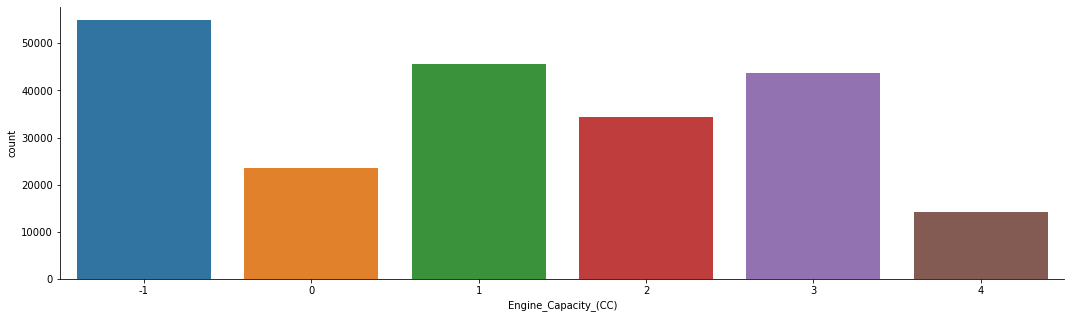

In [74]:
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.countplot(vehicles_df['Engine_Capacity_(CC)'])
sns.despine()

In [75]:
vehicles_df.groupby('Vehicle_Type')['Accident_Index'].count()

Vehicle_Type
-1        309
 1      17437
 2       1489
 3       8053
 4       2119
 5       5228
 8       4696
 9     152686
 10       405
 11      3902
 16        65
 17       423
 18        26
 19     12579
 20       982
 21      3357
 22       250
 23        65
 90      1005
 97       415
 98       890
Name: Accident_Index, dtype: int64

In [76]:
# grouping of vehicle types into their various categories
vehicles_df['Vehicle_Type'] = vehicles_df['Vehicle_Type'].apply(lambda x: 0 if x == 1 else x)
vehicles_df['Vehicle_Type'] = vehicles_df['Vehicle_Type'].apply(lambda x: 1 if x == 8 or x == 9 else x)
vehicles_df['Vehicle_Type'] = vehicles_df['Vehicle_Type'].apply(lambda x: 2 if x == 2 or x == 3 or x==4 or x== 5 or x==23 or x==97 else x)
vehicles_df['Vehicle_Type'] = vehicles_df['Vehicle_Type'].apply(lambda x: 3 if x == 10 or x ==11 else x)
vehicles_df['Vehicle_Type'] = vehicles_df['Vehicle_Type'].apply(lambda x: 4 if x == 19 or x == 20 or x == 21 or x == 98 else x)
vehicles_df['Vehicle_Type'] = vehicles_df['Vehicle_Type'].apply(lambda x: 5 if x == 16 or x == 17 or x == 18 or x == 22 or x== 90 else x)

In [77]:
# visualize the vehicle type after categorization
vehicles_df.groupby('Vehicle_Type')['Accident_Index'].count()

Vehicle_Type
-1       309
 0     17437
 1    157382
 2     17369
 3      4307
 4     17808
 5      1769
Name: Accident_Index, dtype: int64

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


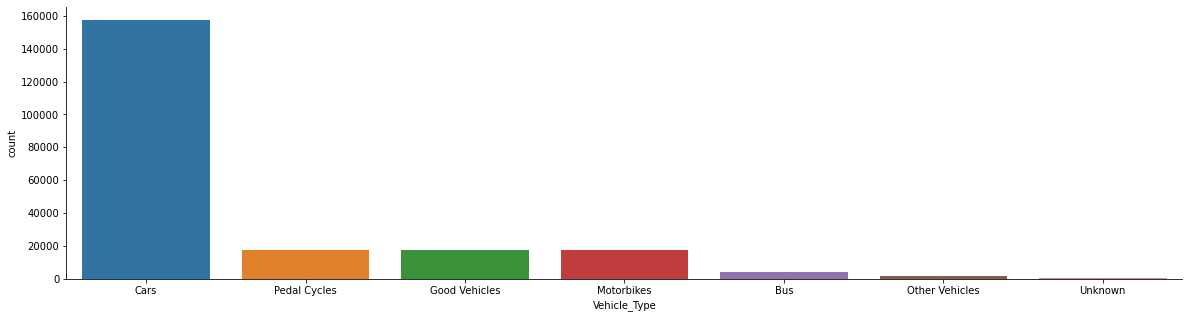

In [78]:
veh_type = vehicles_df['Vehicle_Type'].replace({-1:'Unknown', 0:'Pedal Cycles', 1:'Cars', 2:'Motorbikes', 3:'Bus', 4:'Good Vehicles', 5:'Other Vehicles'})

# visualize the vehicle type categorization
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(veh_type)
sns.despine()

To determine the type of vehicles frequently involve in accident, different vehicles were categorized and the vehicle types after categorization shows that the vehicle type that most frequently involve in accident is category two which is Cars. 

#### (g)	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

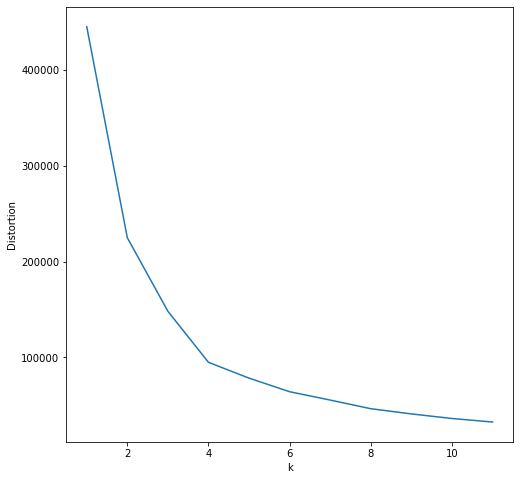

In [80]:
# use longitude and latitude to check location that are more frequently involve in road traffic accidents.
attributes = ['Longitude', 'Latitude']
geo = accidents_df[attributes]

# Kmeans to form cluster
clusters = range(1, 12)
xy= list()

for i in clusters:
    km = KMeans(n_clusters=i, random_state= 42)
    km.fit(geo)
    x = km.inertia_
    xy.append(x)
    
plt.figure(figsize=(8,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.plot(clusters, xy)

In [81]:
km = KMeans(n_clusters=4)
km.fit(geo)
labels = km.fit_predict(geo)
centroids = km.cluster_centers_

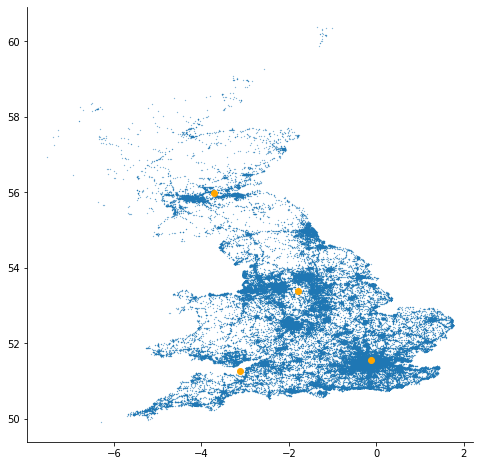

In [82]:
fig = plt.figure(figsize=(8,8))
plt.scatter(geo['Longitude'], geo['Latitude'], s=0.05)

plt.scatter(centroids[:,0], centroids[:,1], color='orange')
sns.despine()

The dot distribution map above shows that 4 cities such as London, Cardiff(wales), Manchester, Scotland (Edinburgh, Glasgow) are areas with 
Higher density of accident (i.e., accident hotspot) indicated with an orange dot when compared with other cities in the UK. 

#### Weather condition and Speed limit

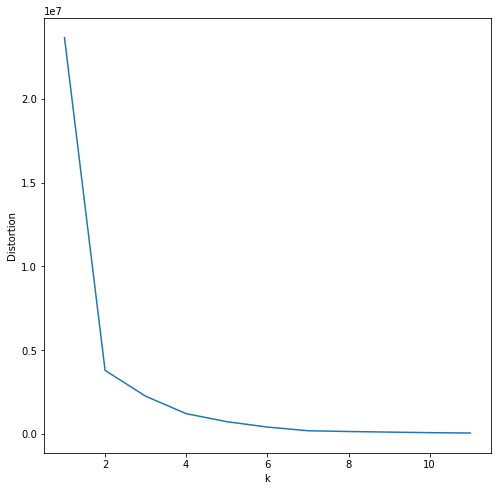

In [83]:
# Weather_Conditions and Speed_limit to check condition that generate more road traffic accidents.
attributes = ['Weather_Conditions', 'Speed_limit']
weather_speedLimit = accidents_df[attributes]

# Kmeans to form cluster
clusters = range(1, 12)
xy= list()

for i in clusters:
    km = KMeans(n_clusters=i, random_state= 42)
    km.fit(weather_speedLimit)
    x = km.inertia_
    xy.append(x)
    
plt.figure(figsize=(8,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.plot(clusters, xy)

In [84]:
km = KMeans(n_clusters=2)
km.fit(weather_speedLimit)
labels = km.fit_predict(weather_speedLimit)
centroids = km.cluster_centers_

Text(0.5, 0, 'Weather Condition')

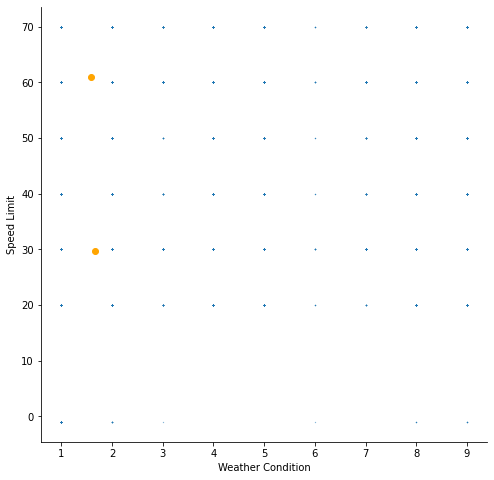

In [85]:
fig = plt.figure(figsize=(8,8))
plt.scatter(weather_speedLimit['Weather_Conditions'], weather_speedLimit['Speed_limit'], s=0.05)

plt.scatter(centroids[:,0], centroids[:,1], color='orange')
sns.despine()

plt.ylabel('Speed Limit')
plt.xlabel('Weather Condition')

The graph above shows the weather conditions where speed limit is clustered. This means that there are more accidents under the weather condition 1 with speed limit of 30 and 60. 

In [86]:
# weather condition and speed limit that generate road traffic accident
weather_speedLimit_df = accidents_df.groupby(['Weather_Conditions', 'Speed_limit'])[['Accident_Index']].count().reindex().rename(columns={'Accident_Index':'Counts'}).sort_values(by='Counts', ascending=False)
weather_speedLimit_df

Counts
Weather_Conditions Speed_limit        
1                   30           54682
                    60           11226
                    20            9158
2                   30            8741
1                   40            7990
                    70            5448
                    50            3756
9                   30            2401
2                   60            2028
8                   30            1780
2                   20            1399
                    40            1334
                    70            1151
5                   30             698
4                   30             665
2                   50             629
8                   20             495
9                   20             427
8                   60             319
5                   60             274
9                   60             250
8                   40             220
4                   60             190
9                   40             185
3                   30             179
5                   70             172
7                   30             147
                    60             143
5                   40             127
8                   70             125
4                   20             118
                    40             114
5                   20             103
8                   50             100
9                   70              89
4                   70              86
9                   50              78
3                   60              74
4                   50              57
1                  -1               56
5                   50              56
3                   70              40
7                   70              36
                    40              29
3                   20              29
7                   50              26
3                   40              19
7                   20              13
6                   30              12
2                  -1               12
3                   50              11
6                   60              10
                    70               6
9                  -1                6
6                   20               5
8                  -1                4
6                   40               3
                    50               3
                   -1                1
3                  -1                1

This shows that the highest number of accidents occurs under weather condition 1 which denotes that the weather is fine and no high winds with speed limit 30 and 60 having a total count of 54682 and 11226 accidents respectively. 

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


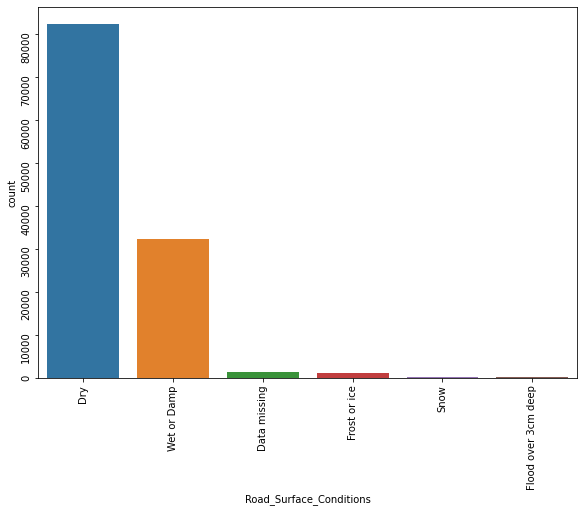

In [87]:
# Road Surface Distribution
road_surface_data =accidents_df.copy()
road_surface_data['Road_Surface_Conditions'].replace({-1:'Data missing', 1:'Dry', 2:'Wet or Damp', 3:'Snow', 4:'Frost or ice', 5:'Flood over 3cm deep', 6:'Oil or diesel', 7:'Mud'}, inplace = True)


fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8,7))
#fig, ax = plt.subplots(figsize=(8,7)
ax = sns.countplot(road_surface_data['Road_Surface_Conditions'])
ax.tick_params(labelrotation=90)
#ax.set_title('\nDistribution of Road Surface Conditions')

The graph above shows that the road traffic accidents occurs mostly on a dry surface.

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '\nDistribution of Junction details')

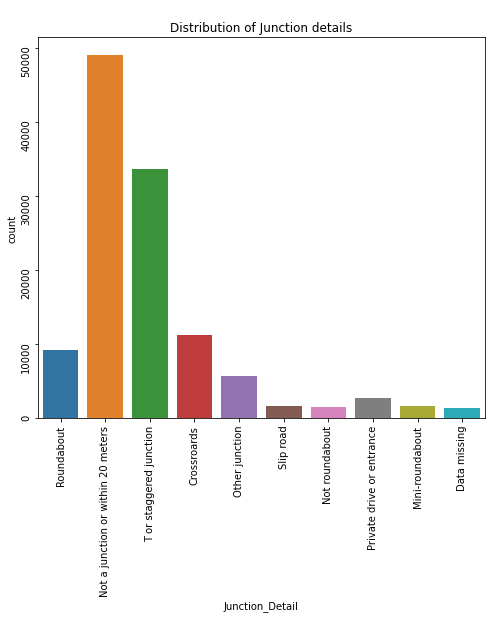

In [88]:
# PLot of Junction Details
junction_data =accidents_df.copy()
junction_data['Junction_Detail'].replace({-1: 'Data missing', 0: 'Not a junction or within 20 meters', 1: 'Roundabout', 2:'Mini-roundabout', 3: 'T or staggered junction', 5: 'Slip road', 6: 'Crossroards', 7: 'Not roundabout', 8: 'Private drive or entrance', 9: 'Other junction'}, inplace = True)

fig, ax = plt.subplots(figsize=(8,7))
ax.tick_params(labelrotation=90)
ax = sns.countplot(junction_data['Junction_Detail'])
ax.set_title('\nDistribution of Junction details')

In [ ]:
The graph above shows that where accidents occur mostly is not a junction 

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '\nDistribution of Vehicle Manouver')

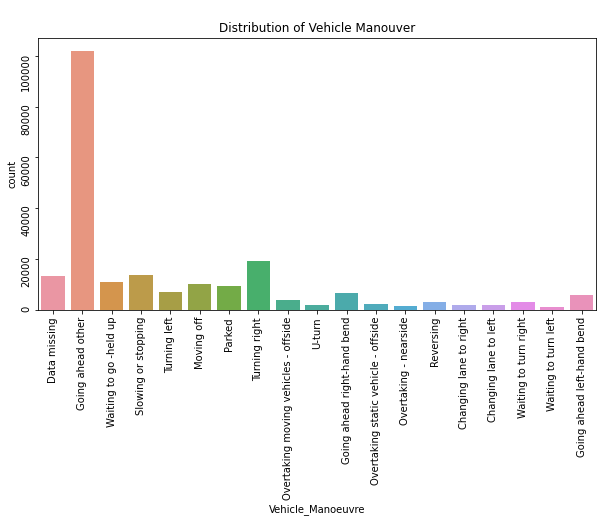

In [89]:
# Plot of Vehicle manouver
veh_manoeuvre_data =vehicles_df.copy()
veh_manoeuvre_data['Vehicle_Manoeuvre'].replace({-1:'Data missing', 1: 'Reversing', 2: 'Parked', 3: 'Waiting to go -held up', 4: 'Slowing or stopping', 5: 'Moving off', 6: 'U-turn', 7: 'Turning left', 8: 'Waiting to turn left', 9: 'Turning right', 10: 'Waiting to turn right', 11: 'Changing lane to left', 12: 'Changing lane to right', 13: 'Overtaking moving vehicles - offside', 14: 'Overtaking static vehicle - offside', 15: 'Overtaking - nearside', 16: 'Going ahead left-hand bend', 17: 'Going ahead right-hand bend', 18: 'Going ahead other'}, inplace = True)

fig, ax = plt.subplots(figsize=(10,5))
ax.tick_params(labelrotation=90)
ax = sns.countplot(veh_manoeuvre_data['Vehicle_Manoeuvre'])
ax.set_title('\nDistribution of Vehicle Manouver')

The graph above shows that vehicles going ahead of others have highest number road accidents.

####  (H) How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

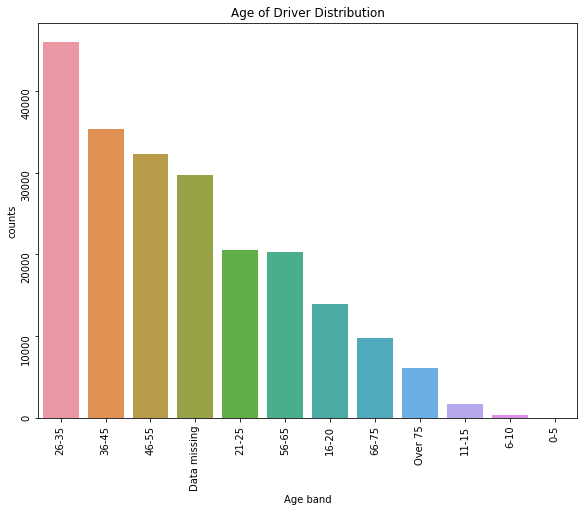

26-35           45993
36-45           35341
46-55           32281
Data missing    29756
21-25           20568
56-65           20344
16-20           13947
66-75            9848
Over 75          6169
11-15            1727
6-10              364
0-5                43
Name: Age_band, dtype: int64

In [90]:
# Plot of Drivers age
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8,7))
vehicles_df['Age_band'] = vehicles_df['Age_Band_of_Driver'].map({1: '0-5', 2: '6-10', 3: '11-15', 4: '16-20', 5: '21-25', 6: '26-35', 7: '36-45', 8: '46-55', 9: '56-65', 10: '66-75', 11: 'Over 75', -1: 'Data missing'}) 
drivers_age = vehicles_df['Age_band'].value_counts()

sns.barplot(ax=axs, x = drivers_age.index, y = drivers_age)
axs.set_title("Age of Driver Distribution")
axs.tick_params(labelrotation=90)
plt.xlabel('Age band')
plt.ylabel('counts')
plt.show()
drivers_age

The graph above shows that the age range of drivers that is mostly involve in road traffic accidents is between 26-35 years

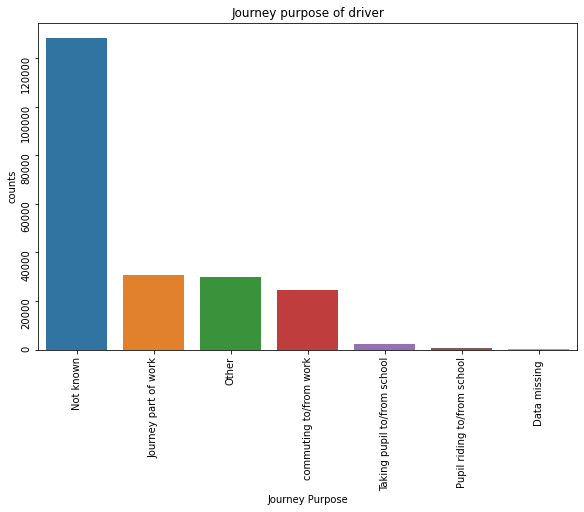

Not known                      128259
Journey part of work            30692
Other                           29807
commuting to/from work          24390
Taking pupil to/from school      2356
Pupil riding to/from school       819
Data missing                       58
Name: Journey_Purpose_of_Driver, dtype: int64

In [91]:
# Plot of Journey Purpose of driver
vehicles_df['Journey_Purpose_of_Driver'] = vehicles_df['Journey_Purpose_of_Driver'].map({1: 'Journey part of work', 2: 'commuting to/from work', 3: 'Taking pupil to/from school', 4: 'Pupil riding to/from school', 5: 'Other', 6:'Not known', 15:'Other/Not known', -1: 'Data missing '})
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(8,7))
journey_purpose = vehicles_df['Journey_Purpose_of_Driver'].value_counts()

sns.barplot(ax=axs, x = journey_purpose.index, y = journey_purpose)
axs.set_title("Journey purpose of driver")
axs.tick_params(labelrotation=90)
plt.xlabel('Journey Purpose')
plt.ylabel('counts')
plt.show()
journey_purpose

The graph above shows that the Journey purpose of the drivers that involved in a road traffic accidents is not known. 

#### PCA Clustering

In [92]:
features = ['Road_Surface_Conditions', 'Junction_Detail', 'Day_of_Week', 'Weather_Conditions', 'Speed_limit', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Light_Conditions', 'Urban_or_Rural_Area', 'decimal_time']
target = ['Accident_Severity']

x = accidents_df.loc[:, features].values
y = accidents_df.loc[:, target].values

x = StandardScaler().fit_transform(x)

In [93]:
# use pca to cluster all the possible conditions against accident severity to see if there will be a clusters for conditions generally
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)

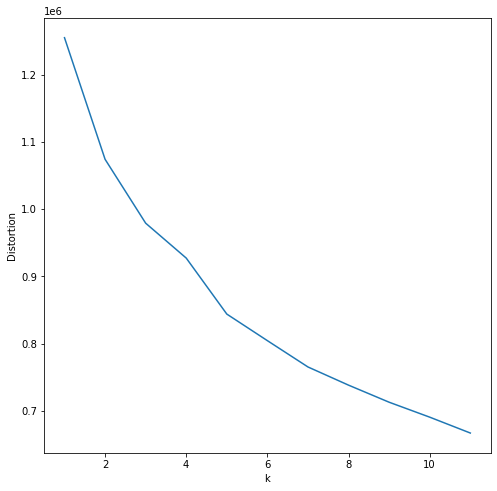

In [94]:
clusters = range(1,12)
xy = list()

for i in clusters:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(principalComponents)
    x = km.inertia_
    xy.append(x)
    
plt.figure(figsize=(8,8))
plt.xlabel('k')
plt.ylabel('Distortion')
plt.plot(clusters, xy)

C:\Users\ju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


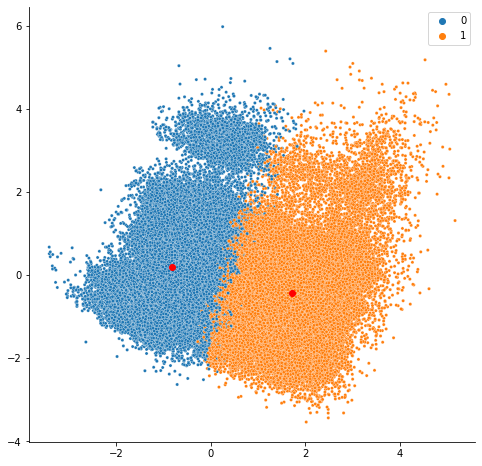

In [95]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(principalComponents)
labels = km.predict(principalComponents)
centroids = km.cluster_centers_

fig = plt.figure(figsize=(8,8))
sns.scatterplot(principalComponents[:,0], principalComponents[:,1], hue=labels, s=10)

plt.scatter(centroids[:,0], centroids[:,1], color='red')
sns.despine()

Clusters showing conditions where accidents occur mostly when considering the features selected.

### Modelling

In [96]:
veh_cas = pd.merge(vehicles_df, casualties_df, on=['Accident_Index', 'Vehicle_Reference'], how='inner')
merged_dataframe = pd.merge(accidents_df, veh_cas, on=['Accident_Index'], how='inner')
len(merged_dataframe) == len(casualties_df)

True

In [97]:
# extract non fatal accident
merged_dataframe = merged_dataframe[merged_dataframe['Casualty_Severity'] != 1]

In [98]:
# create a binary value
merged_dataframe['Casualty_Severity'].replace({3:1, 2:0}, inplace = True)

In [99]:
merged_dataframe['Casualty_Severity'].value_counts()

1    125461
0     25945
Name: Casualty_Severity, dtype: int64

In [109]:
# drop columns that are not useful.
drop_columns = ['Accident_Index', 'Vehicle_Reference', 'Casualty_Severity', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile', 'Police_Force', 'Accident_Severity',
       'Number_of_Casualties', 'Date', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'period', 'Age_Band_of_Driver', 'sunrise', 'sunset', 
       'sunrise_decimal_time', 'sunset_decimal_time', 'sunrise_before', 'sunset_after', 'Journey_Purpose_of_Driver',
        'Age_band', 'sunrise_after', 'sunset_before']
        
xx = merged_dataframe.drop(columns=drop_columns)
yy = merged_dataframe['Casualty_Severity']

<ipython-input-112-69ee0b4be809>:8: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


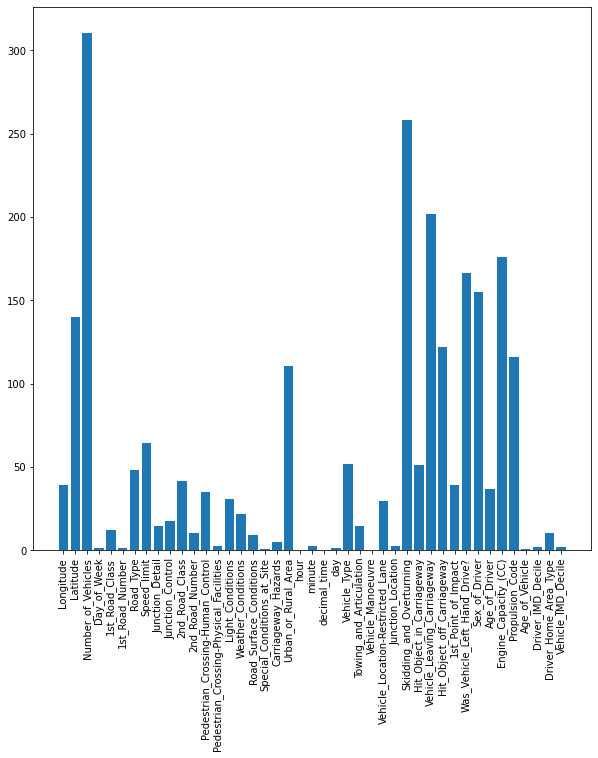

In [112]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")

selector.fit(xx, yy)

# Here we will get the p-values for each feature and then transform from p-values into some scores

scores = -np.log10(selector.pvalues_)

# Use plt to plot the scores!  

plt.figure(figsize=(10,10))

plt.bar(range(len(xx.columns)), scores)

plt.xticks(range(len(xx.columns)), xx.columns, rotation='vertical')

plt.show()

In [113]:
# perform the feature selection
selector = SelectKBest(f_classif, k=20)
feature = xx.columns[selector.fit(xx, yy).get_support()]

In [114]:
# extract x and y
x = merged_dataframe[feature]
y = merged_dataframe['Casualty_Severity']

# Splitting of data into 75% train and 25% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.25, random_state=1, stratify=y)

In [115]:
def get_stacking():
    level0 = list()
    level0.append(('decision_tree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('logistic_regression', LogisticRegression()))
    level0.append(('naive_bayes', GaussianNB()))
    #level0.append(('random forest', RandomForestClassifier()))
    
    
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [116]:
def get_models():
    models = dict()
    models['decision_tree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['logistic_regression'] = LogisticRegression()
    models['naive_bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    #models['random forest'] = RandomForestClassifier()
    
    return models

In [117]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [118]:
#Grab the models to use.
models = get_models()

#Run and Evaluate the models.
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model,x_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>decision_tree 0.584 (0.007)
>knn 0.529 (0.003)
>logistic_regression 0.501 (0.001)
>naive_bayes 0.563 (0.006)
>stacking 0.509 (0.002)


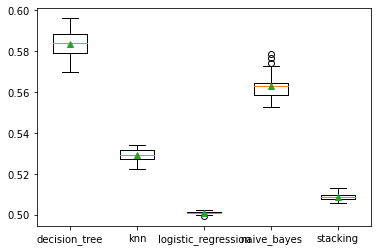

In [119]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show() 

model was trained using cross validation and balanced accuracy, and the balanced accuracy was displayed inform of a box plot. the higher the plot, the higher the balance accuracy and Decision tree classifier have best accuracy with imbalanced dataset.

### Balanced the Dataset

In [120]:
# Balance the Dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)

In [121]:
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model,x_res, y_res)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>decision_tree 0.775 (0.003)
>knn 0.803 (0.003)
>logistic_regression 0.690 (0.003)
>naive_bayes 0.625 (0.003)
>stacking 0.842 (0.003)


### Dropping of -1

In [122]:
# drop all the negatives in the data
dataframe2 = merged_dataframe.copy()
dataframe2.replace(-1, np.nan, inplace=True)
dataframe2.dropna(inplace=True)

In [123]:
# extract x and y
x2 = dataframe2[feature]
y2 = dataframe2['Casualty_Severity']

from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2,test_size=.25, random_state=1, stratify=y2)

In [124]:
# Using Balance Dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_res2, y_res2 = sm.fit_resample(x_train2, y_train2)

In [125]:
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model,x_res2, y_res2)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>decision_tree 0.847 (0.005)
>knn 0.820 (0.005)
>logistic_regression 0.726 (0.005)
>naive_bayes 0.682 (0.006)
>stacking 0.887 (0.004)


The negative numbers in the data was dropped and the data was balanced and retrained by passing it into the model to see if it will improve prediction

### Stacking Classifier

In [127]:
stack = get_stacking()
stack = stack.fit(x_res2, y_res2)

y_pred = stack.predict(x_test2)
acc = accuracy_score(y_test2, y_pred)
acc

C:\Users\ju\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ju\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7819750397855767

In [129]:
# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred)

cr = classification_report(y_test2, y_pred)

print(cm)

print(cr)

[[ 535 1295]
 [1308 8801]]
              precision    recall  f1-score   support

           0       0.29      0.29      0.29      1830
           1       0.87      0.87      0.87     10109

    accuracy                           0.78     11939
   macro avg       0.58      0.58      0.58     11939
weighted avg       0.78      0.78      0.78     11939



Text(0.5, 15.0, 'Predicted label')

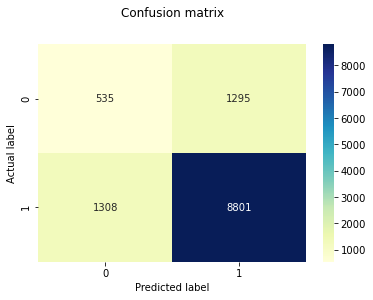

In [130]:
# visualize the confusion metrics
cm = confusion_matrix(y_test2, y_pred)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 1.0, 'Permutation Importances')

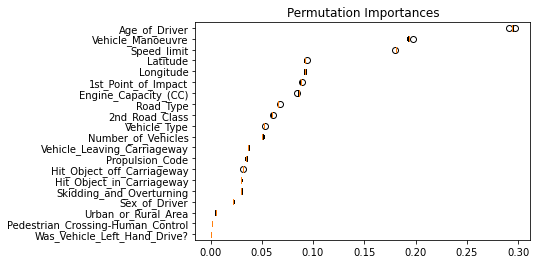

In [133]:
from sklearn.inspection import permutation_importance
results = permutation_importance(stack, x_res2, y_res2, scoring='accuracy')
sorted_idx = results.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(results.importances[sorted_idx].T, vert=False, labels=x_res2.columns[sorted_idx])
ax.set_title("Permutation Importances")

The graph above shows that age of driver, vehicle manoeuvre and speed limit are significance features on road traffic accidents. 

In [134]:
# govt model
govt = pd.read_csv('cas_adjustment_lookup_2019.csv')
# extract for 2019 only
govt_2019 = govt[govt['accident_index'].str.startswith('2019')]

# rename column
govt_2019.rename(columns=({'accident_index':'Accident_Index'}), inplace = True)

C:\Users\ju\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


###  Govt_2019 Data

In [135]:
len(merged_dataframe) ==  len(govt_2019)

df_gov = merged_dataframe[['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference','Casualty_Severity']]

gov = pd.merge(govt_2019, df_gov, on=['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference'], how='inner')

In [144]:
pred_gov = round(gov.Adjusted_Slight)

y_gov = gov.Casualty_Severity
cr = classification_report(y_gov, pred_gov)

print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25945
           1       1.00      1.00      1.00    125461

    accuracy                           1.00    151406
   macro avg       1.00      1.00      1.00    151406
weighted avg       1.00      1.00      1.00    151406



Classification report for the government data gives an accuracy of 1.0

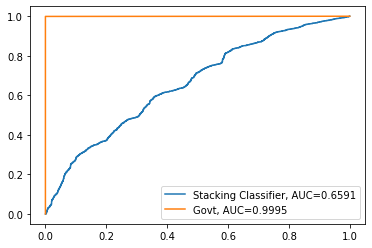

In [145]:
y_pred = stack.predict_proba(x_test2)[:, 1]

fpr, tpr, _ = roc_curve(y_test2, y_pred)

auc = round(roc_auc_score(y_test2, y_pred), 4)
plt.plot(fpr,tpr,label="Stacking Classifier, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve

fpr, tpr, _ = roc_curve(y_gov, pred_gov)

auc = round(roc_auc_score(y_gov, pred_gov), 4)

plt.plot(fpr,tpr,label="Govt, AUC="+str(auc))

# add legend  

plt.legend()

Roc curve was created for the best model (Stacking classifier) and the government model. The Staking AUC value is lower than Gornment AUC Value.